# 2) Data Understanding

- **Data Source:** IBM’s public dataset – *Telco Customer Churn* (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data).
- **Data Structure:** Each row represents a customer; columns include gender, contract type, internet service, total charges, and more.
- **Target Variable:** `Churn` (binary: "Yes" or "No").

In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Aesthetic settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
# Load dataset
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

## 2. Data Understanding

## 2.1 General Overview

In [5]:
# --------------------------------------------
# 1. General Overview
# --------------------------------------------
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nSample data:\n", df.head())

Dataset shape: (7043, 21)

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Sample data:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male  

Key Insights from the Data Overview

1. Dataset Dimensions

* The dataset contains 7,043 rows (customers) and 21 columns (features).

Insight: This is a medium-sized dataset, suitable for supervised learning models without the need for heavy big data tools.

## 2.2 Check for missing values

In [6]:
# --------------------------------------------
# 2. Check for missing values
# --------------------------------------------
print("\nMissing values per column:\n", df.isnull().sum())

# Convert 'TotalCharges' from string to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print("\nMissing values in 'TotalCharges' after conversion:", df["TotalCharges"].isnull().sum())


Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values in 'TotalCharges' after conversion: 11


## 2.3 Descriptive statistics

In [7]:
# --------------------------------------------
# 3. Descriptive statistics
# --------------------------------------------
print("\nDescriptive statistics - numerical variables:\n", df.describe())
print(
    "\nDescriptive statistics - categorical variables:\n",
    df.select_dtypes(include="object").describe(),
)


Descriptive statistics - numerical variables:
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Descriptive statistics - categorical variables:
         customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555 

## 2.4 Target variable distribution

In [8]:
# --------------------------------------------
# 4. Target variable distribution
# --------------------------------------------
churn_counts = df["Churn"].value_counts()
churn_percent = churn_counts / churn_counts.sum() * 100
print("\nChurn value counts:\n", churn_counts)
print("\nChurn percentage:\n", churn_percent)


Churn value counts:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentage:
 Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


## 2.5 Churn distribution plot

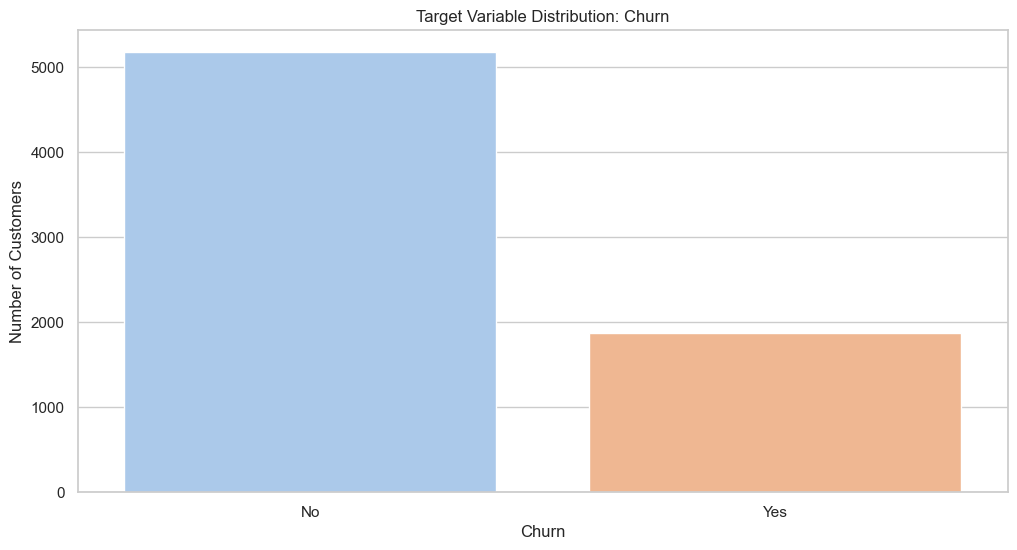

In [9]:
# Churn distribution plot
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Target Variable Distribution: Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

Key Insights from the Churn Distribution Plot

1. Class imbalance is present

The bar chart clearly shows a strong imbalance between the two classes:
* The number of customers who did not churn (No) is significantly higher than those who did churn (Yes).
* Visually, churned customers represent roughly 25–27% of the dataset.

Insight:
This is a class imbalance problem, and ignoring it during modeling could lead to biased models that predict mostly "No" and still achieve high accuracy.

## 2.6 Correlation heatmap (numerical)

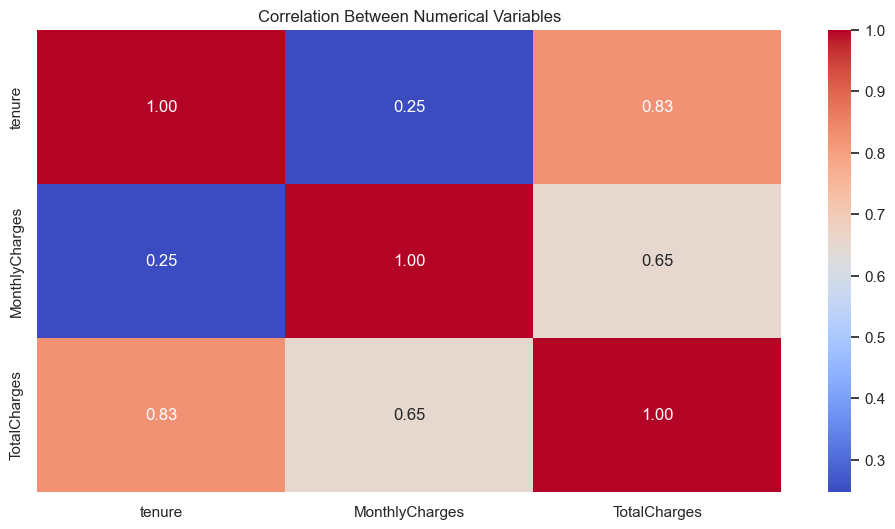

In [10]:
# --------------------------------------------
# 5. Correlation heatmap (numerical)
# --------------------------------------------
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Variables")
plt.show()

Key Insights from the Correlation Heatmap

1. High correlation between TotalCharges and tenure

Correlation = 0.83

This is a strong positive correlation.

Insight:
* The longer a customer stays (tenure), the higher their total charges (TotalCharges).
* This makes sense since TotalCharges ≈ MonthlyCharges × tenure for most cases.

However, TotalCharges also depends on optional services, so it's not a perfect linear relation (not 1.00).

2. Moderate correlation between TotalCharges and MonthlyCharges

Correlation = 0.65

Insight:
* Customers with higher monthly charges tend to accumulate higher total charges.
* But this is not always the case, especially for short-tenure customers or those who churn early.

3. Weak correlation between tenure and MonthlyCharges

Correlation = 0.25

Insight:
* There is little relationship between how long a customer has been with the company and their monthly plan cost.
* This is useful: some long-term customers may still be on cheaper plans, and vice versa

## 2.7 Example: Churn by Contract Type

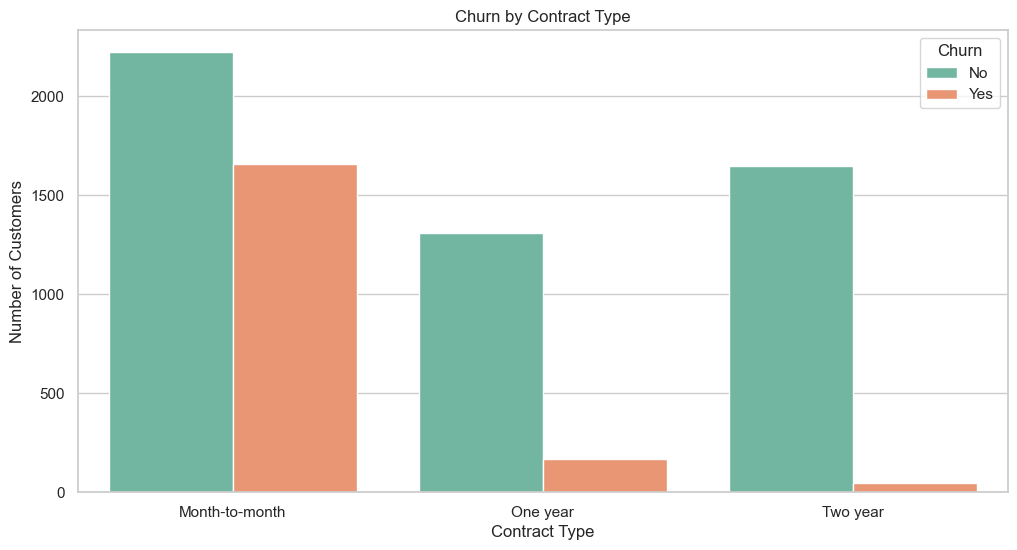

In [11]:
# --------------------------------------------
# 6. Example: Churn by Contract Type
# --------------------------------------------
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.show()

Key Insights from Churn by Contract Type

1. Churn is highest among Month-to-month contracts

Customers with Month-to-month contracts have a much higher churn rate than those with long-term contracts.

The orange (Churn = Yes) portion is almost equal to the green (No) portion in that group.

Insight:
* Customers who are not locked into a contract are far more likely to leave.
* This supports the business assumption that flexibility increases risk of churn.

2. Churn is lowest among Two-year contracts

Very few customers with a Two-year contract churned.

The green bar (retained customers) dominates.

Insight:
* Longer contract commitments are strongly associated with customer retention.

3. One-year contracts show moderate churn

Churn exists but is much lower than for Month-to-month, and higher than for Two-year.

Insight:
* This group may represent a transitional customer profile — not as loyal as long-term clients, but more stable than those with no commitment.

## 2.8 Distribution of numerical variables segmented by Churn

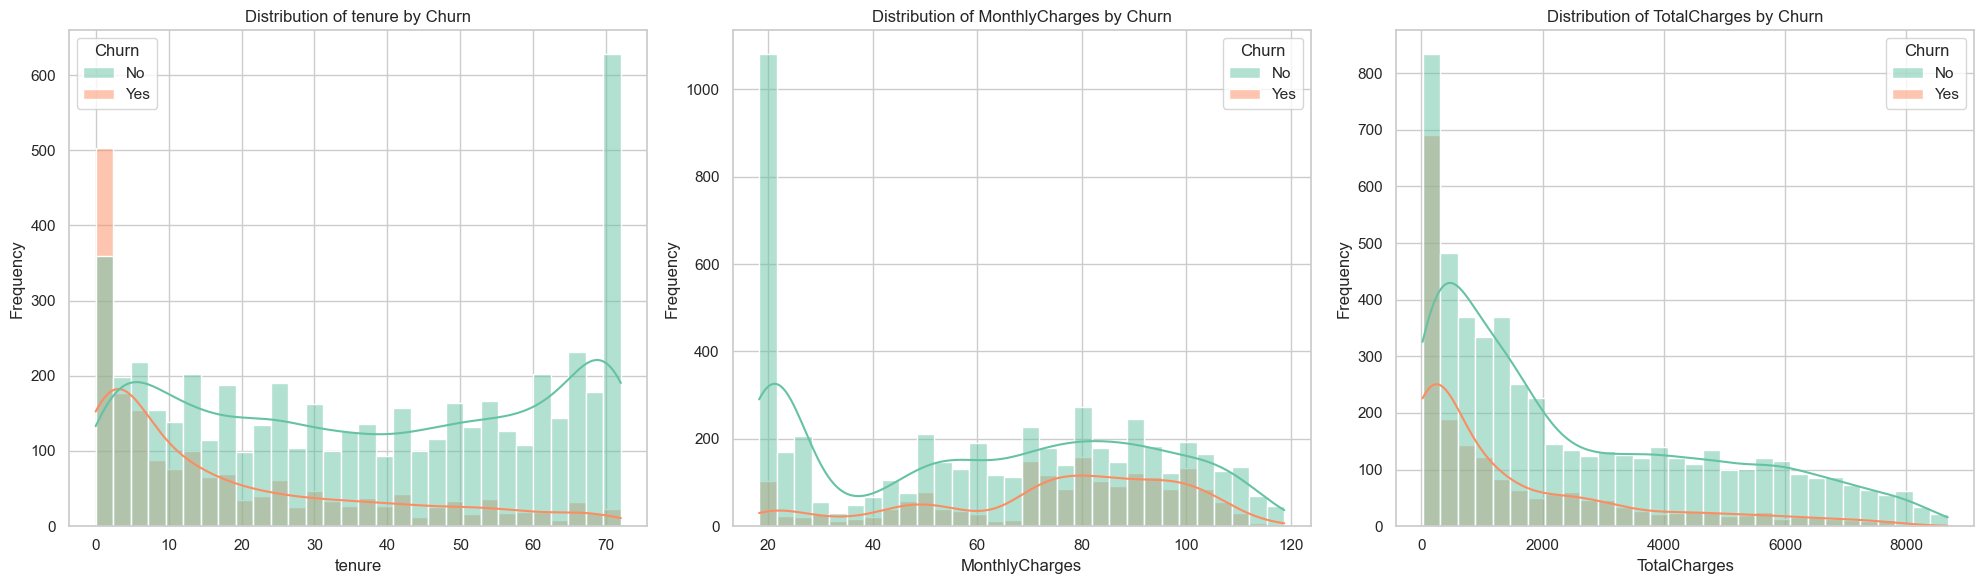

In [12]:
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# Set up the grid: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot each histogram on its corresponding axis
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue="Churn", kde=True, bins=30, palette="Set2", ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Churn")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Insights from Numerical Variable Distributions by Churn

1. tenure vs Churn

Most churned customers (Churn = Yes) have low tenure (especially ≤ 10 months).

Long-tenure customers (e.g., ≥ 50 months) have very low churn.

Insight:
* Early churn is a critical risk. New customers are much more likely to leave within the first year.

2. MonthlyCharges vs Churn

Customers with higher monthly charges (≥ $70) churn more frequently.

Lower charges (~$20) are dominated by retained customers.

Insight:
* High-value plans may increase churn risk if perceived value isn’t delivered.

3. TotalCharges vs Churn

Churned customers have lower TotalCharges, peaking below $2,000.

Customers with high TotalCharges (≥ $5,000) show low churn.

Insight:
* Churn tends to happen before significant revenue is accumulated — often early in the lifecycle.

## 2.9 Boxplots para detectar outliers por Churn

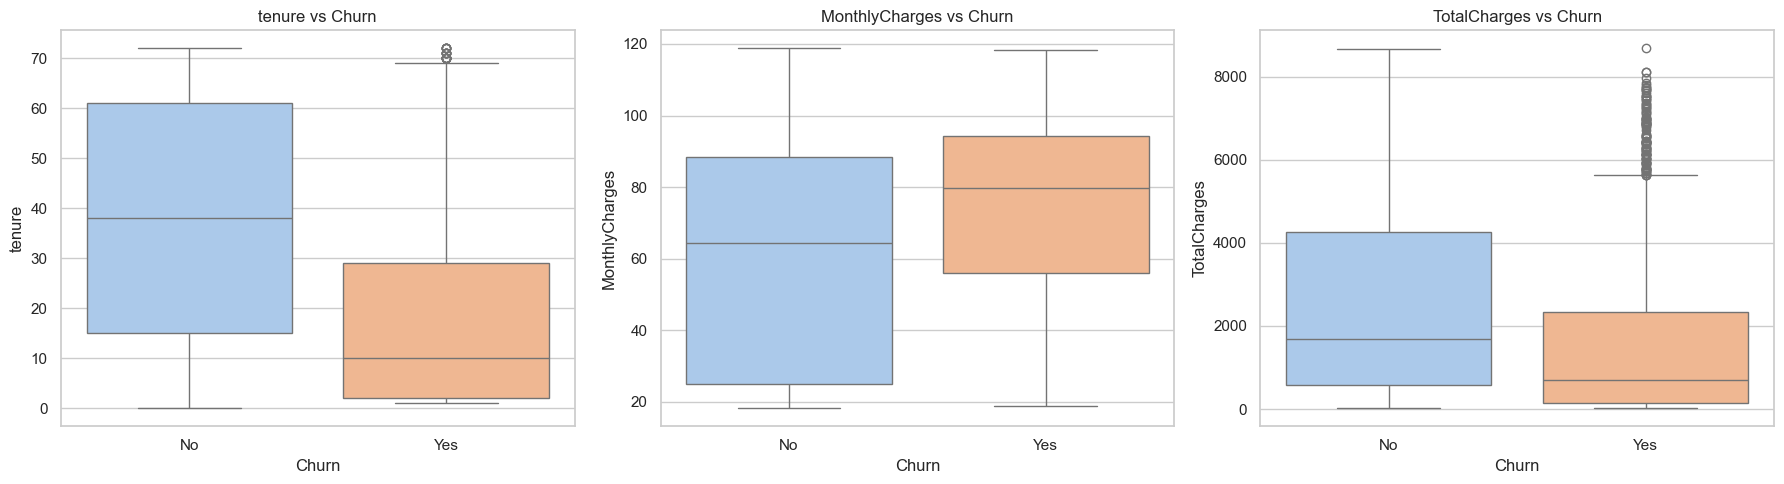

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set number of columns and calculate rows based on number of numerical columns
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten to easily iterate

# Generate each boxplot in a subplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x="Churn", y=col, palette="pastel", ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Key Insights from Boxplots: Numerical Features vs Churn
1. tenure vs Churn

Customers who churned (Yes) have a significantly lower median tenure than those who stayed.

The churn group has a tight IQR concentrated at low tenure values, with fewer long-tenure outliers.

Insight:
* Most churn happens early. Long-standing customers are less likely to leave.

2. MonthlyCharges vs Churn

The median MonthlyCharges is higher for churned customers.

The churn group has a tighter IQR skewed toward higher charges, indicating less price tolerance.

Insight:
* Customers paying more are more sensitive and more likely to churn, possibly due to unmet expectations.

3. TotalCharges vs Churn

Churned customers have much lower total charges overall, with many low outliers.

The retained customers (No) have a wider and higher IQR and more extreme high values.

Insight:
* Customers typically churn before becoming high-revenue clients.

## 2.10 Bar chart for categorical variables vs Churn

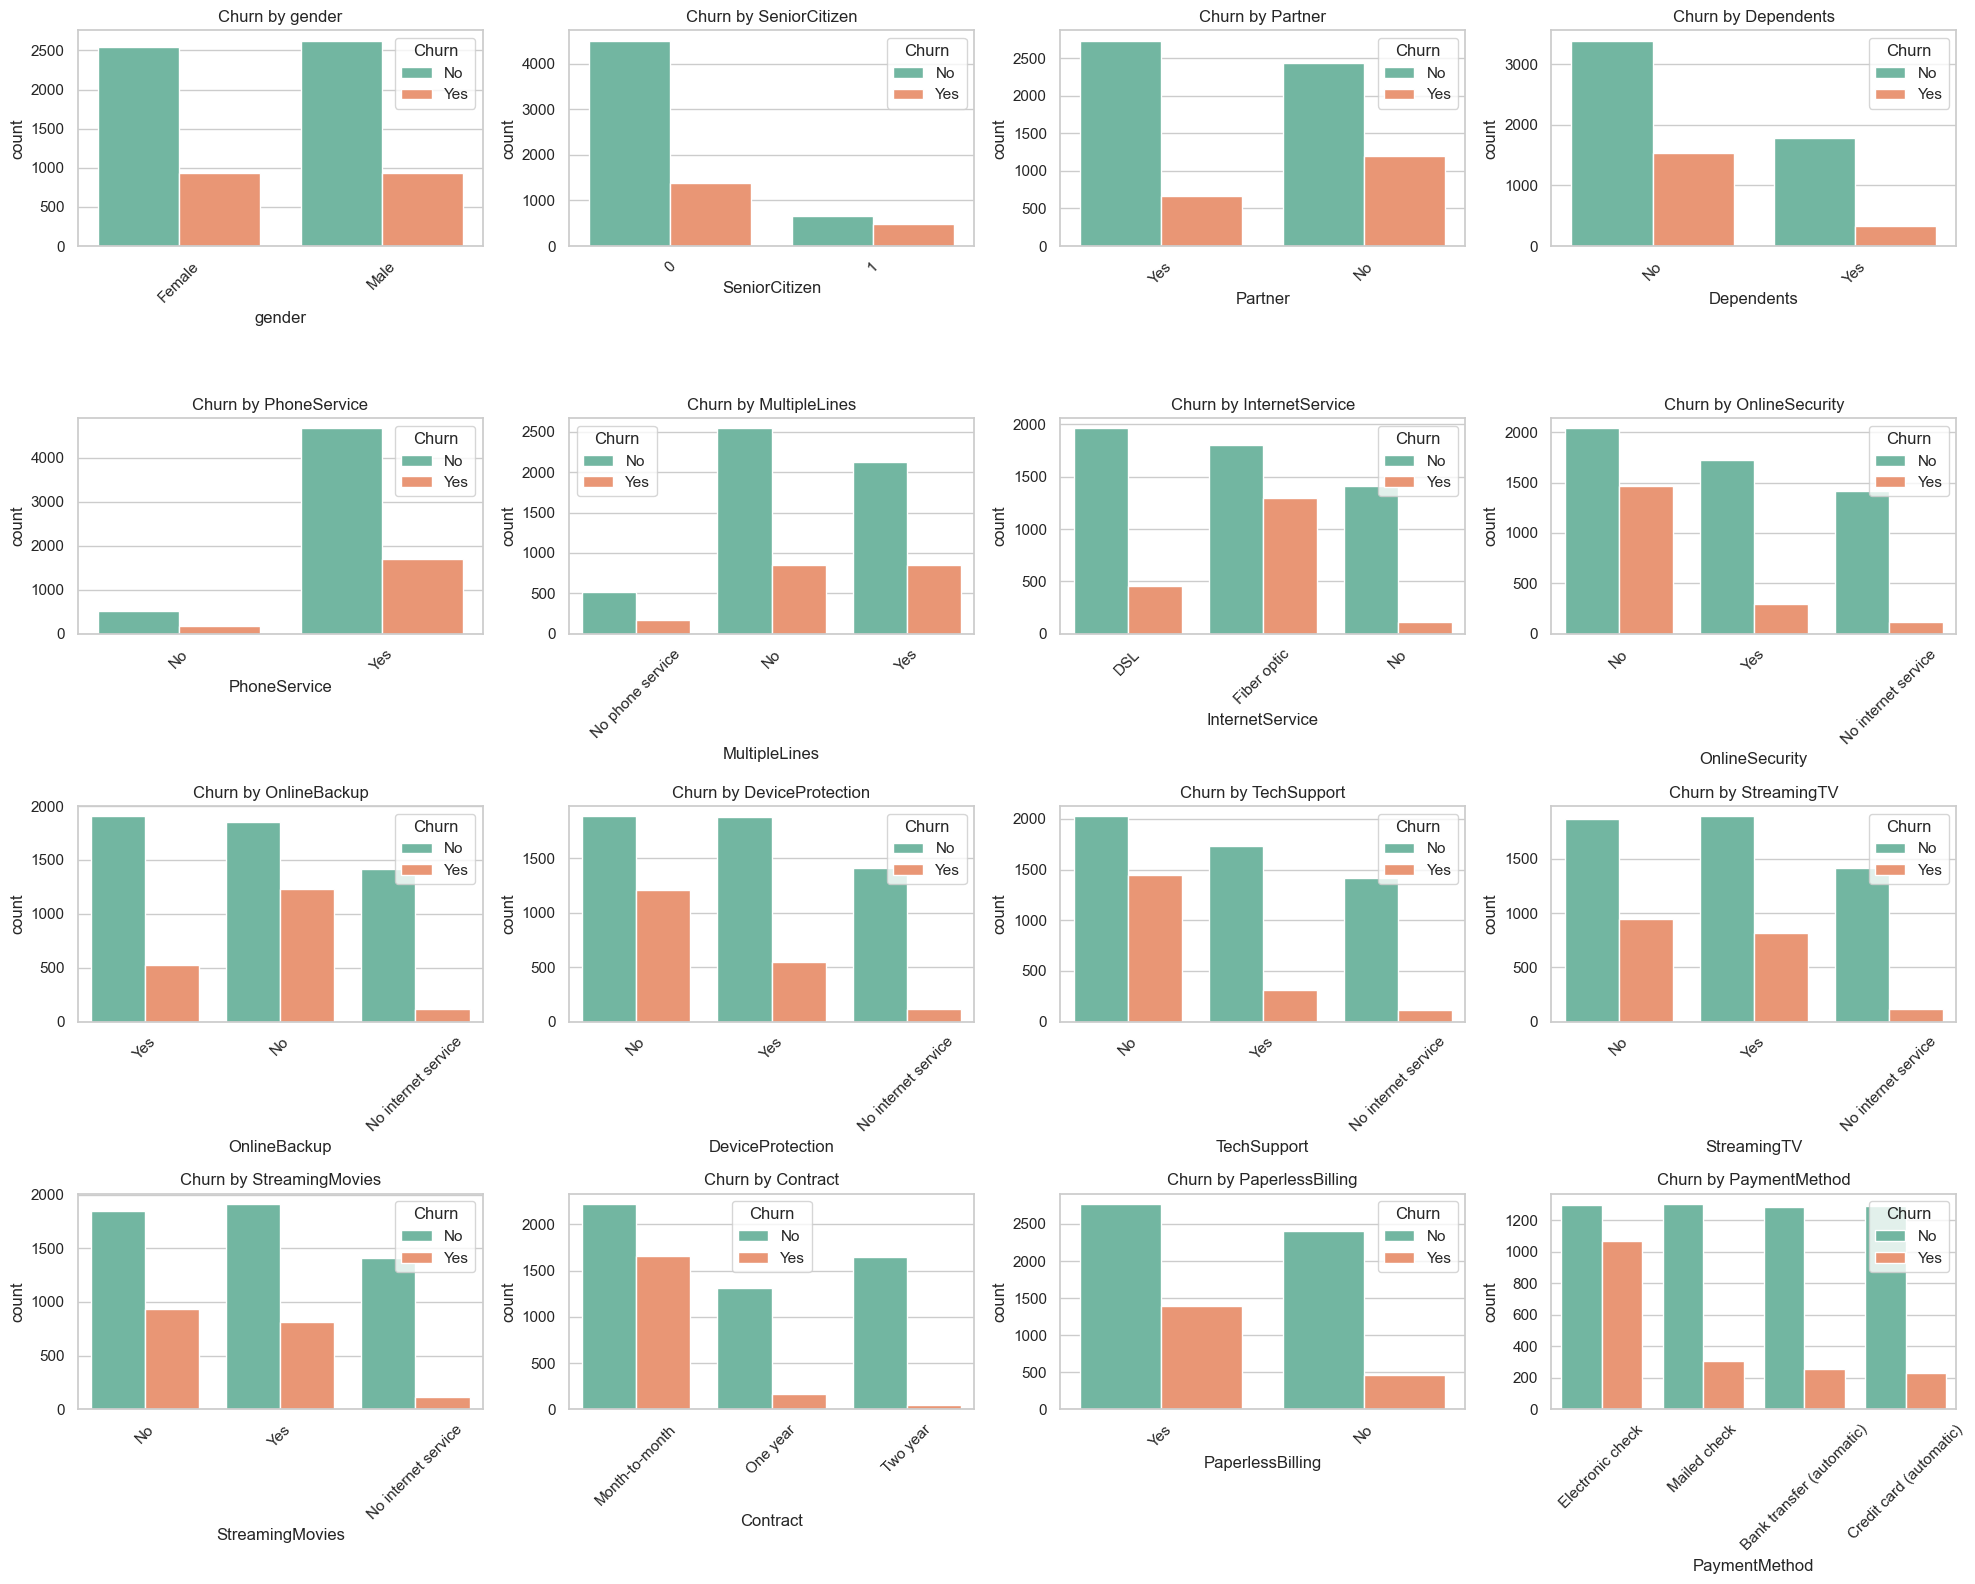

In [14]:
categorical_cols = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
axes = axes.flatten()  # Flatten the 2D array of axes

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue="Churn", palette="Set2", ax=axes[i])
    axes[i].set_title(f"Churn by {col}")
    axes[i].tick_params(axis="x", rotation=45)

# Remove any unused subplots (if total plots < 16)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insights on Bar chart for categorical variables vs Churn:

1. Contract Type is Crucial
* Month-to-month contracts have a much higher churn rate compared to One year and Two year contracts.
* Longer-term contracts help in customer retention.

2. Internet Service
* Customers using fiber optic internet show higher churn than those using DSL or having no internet service.

3. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport
* Customers without these add-on services are more likely to churn.
* Having these services appears to reduce churn risk, possibly due to increased engagement or satisfaction.

4. Streaming Services
* Customers with StreamingTV or StreamingMovies show slightly higher churn, but the impact is less pronounced than technical services like security or backup.

5. Senior Citizens
* Although they represent a smaller group, senior citizens tend to churn more frequently than younger users.

6. Dependents and Partners
* Customers without dependents or partners tend to churn more, suggesting that households with families may be more stable subscribers.

7. Phone Service and Multiple Lines
* No major difference in churn between those with or without PhoneService.
* Having multiple lines does not show a strong correlation with churn.

8. Paperless Billing
* Customers using paperless billing have a higher churn rate, possibly linked to more tech-savvy, deal-hunting behavior.

9. Payment Method
* Electronic check users have a notably higher churn rate than those using automatic payments (like credit cards or bank transfers).
* Suggests that automatic payment methods help retain customers.

10. Gender
* No significant difference in churn between males and females – gender is not a key driver of churn.

## 2.11 Cross-tabulation + churn percentage by category

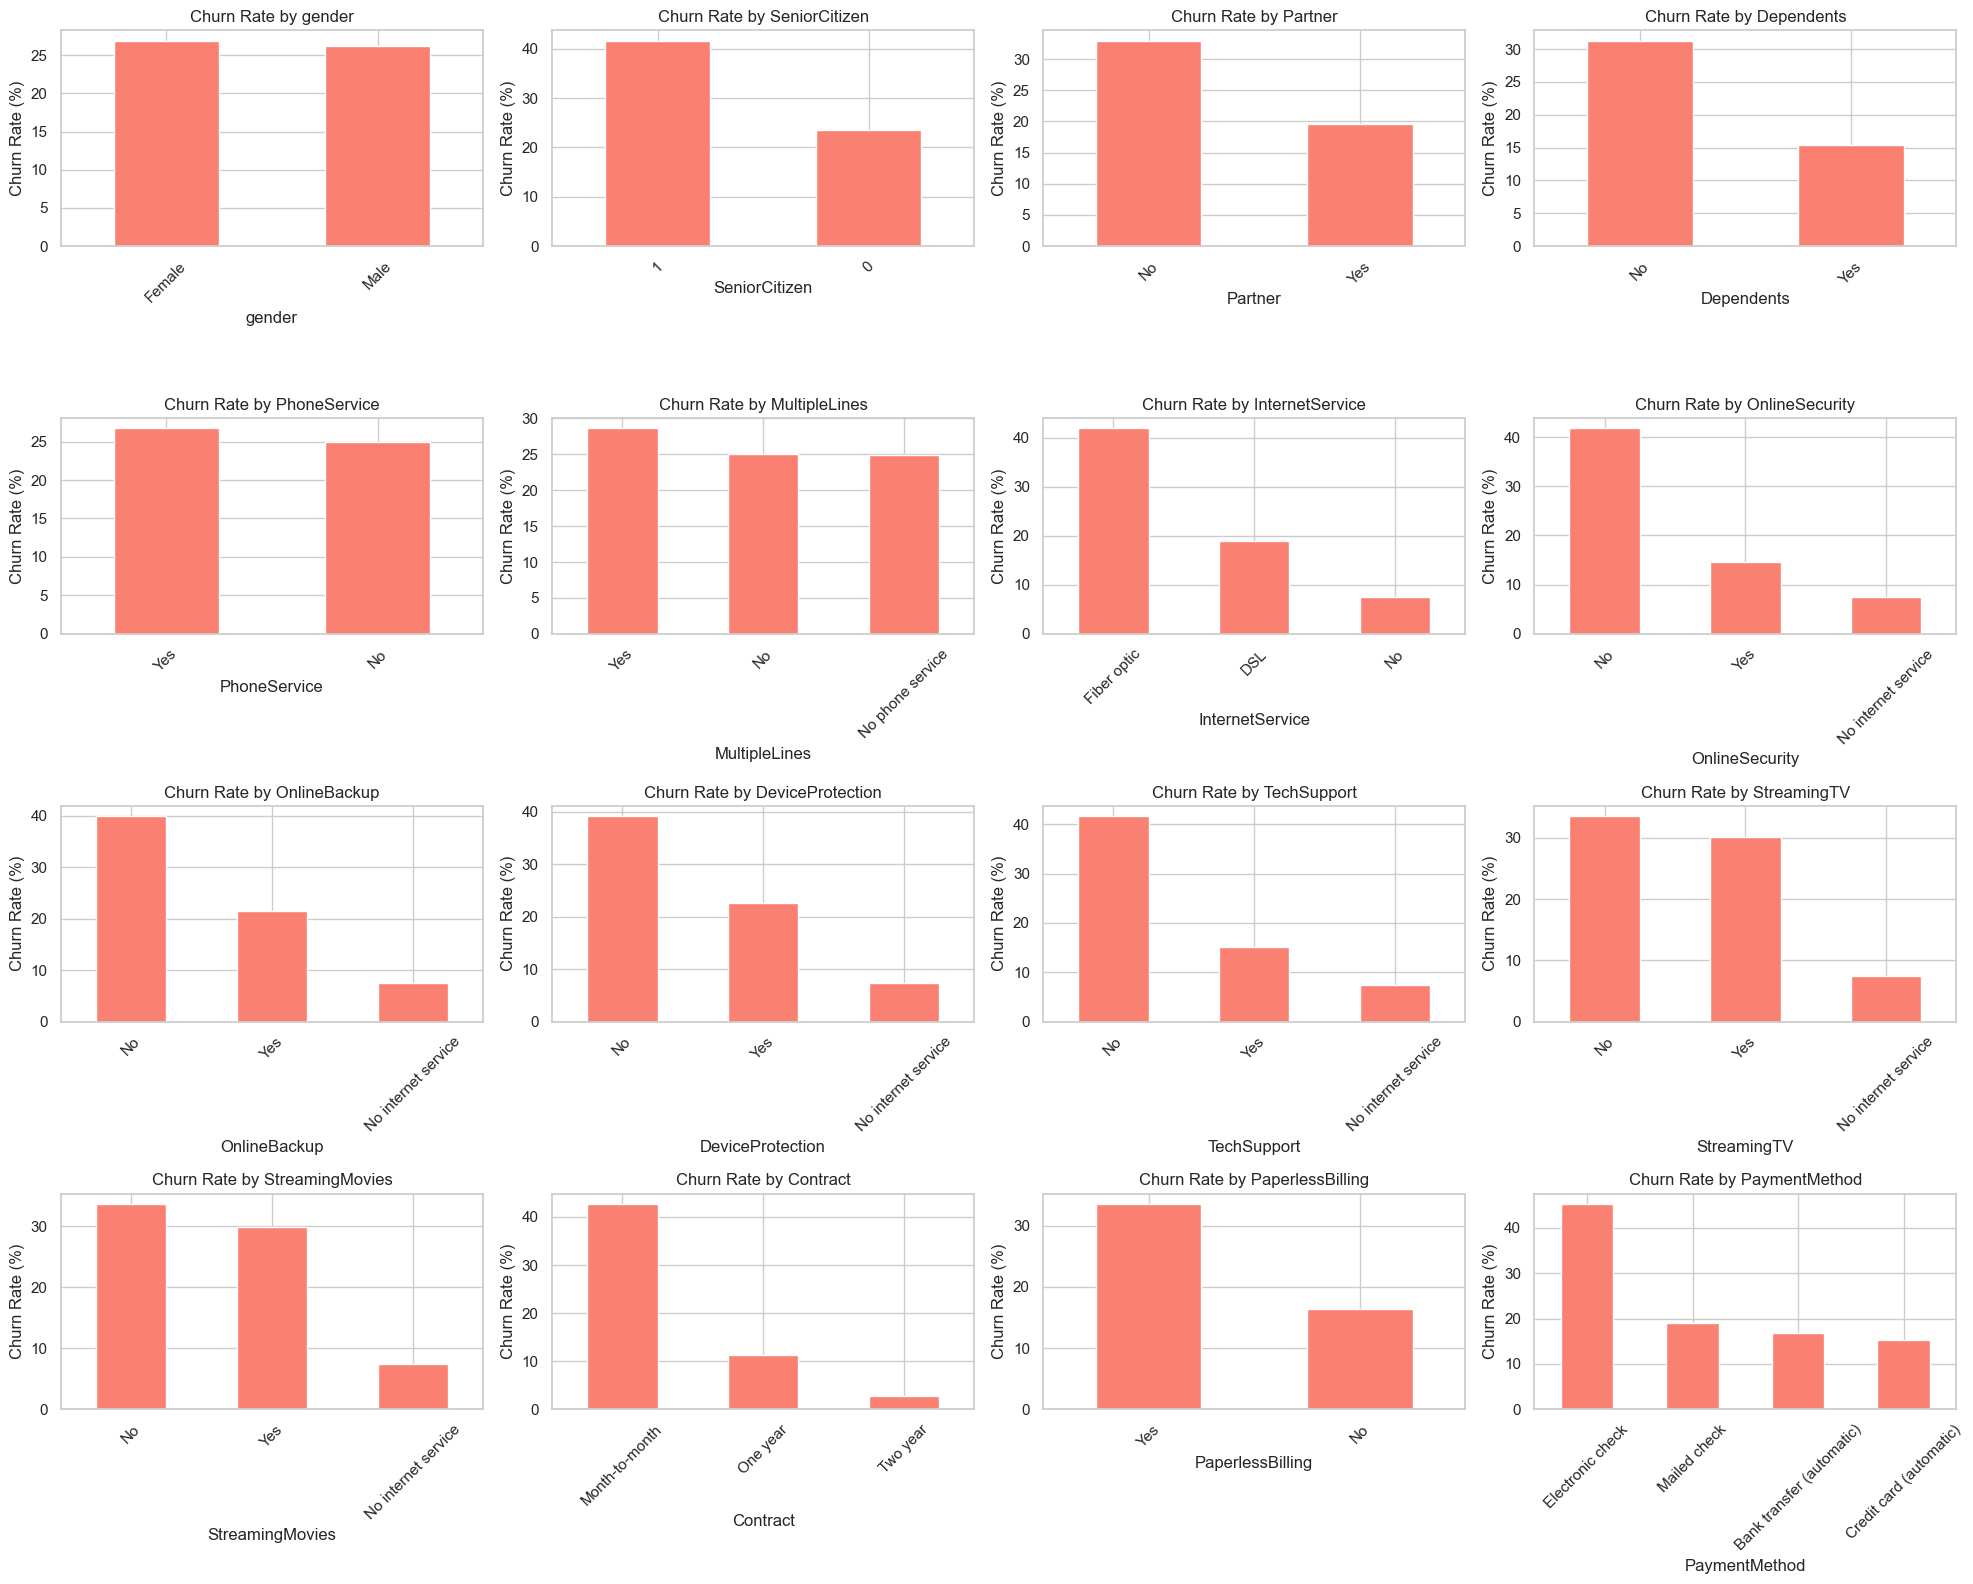

In [15]:
# Number of columns to plot
n_cols = 4
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

for i, col in enumerate(categorical_cols):
    # Compute churn rate per category (normalized by row)
    churn_rate = pd.crosstab(df[col], df["Churn"], normalize="index") * 100
    churn_rate = churn_rate["Yes"].sort_values(ascending=False)

    # Plot churn rate bar plot on the corresponding axis
    churn_rate.plot(kind="bar", color="salmon", ax=axes[i])
    axes[i].set_title(f"Churn Rate by {col}")
    axes[i].set_ylabel("Churn Rate (%)")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis="x", rotation=45)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insights on Cross-tabulation + churn percentage by category

1. Contract Type:

* Month-to-month contracts have by far the highest churn rate, over 40%.
* One year and especially Two year contracts show much lower churn, confirming the loyalty associated with longer commitments.

2. Internet Service:
* Customers using Fiber optic internet have the highest churn rate among all internet service types.
* Customers with no internet service are much less likely to churn.

3. Online Services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport):
* Customers who lack these services have substantially higher churn rates.
* Those who use these features are more loyal, suggesting these services contribute to customer retention.

4. Paperless Billing:
* Customers with Paperless Billing enabled show a higher churn rate than those who don’t use it. This could be linked to tech-savviness or reduced personal connection.

5. Senior Citizens:
* Senior citizens show a higher churn rate than younger customers.

6. Dependents & Partner:
* Customers with no dependents or no partner churn more frequently, which may indicate a single-person household is more price-sensitive or less loyal.

7. Payment Method:
* Electronic check users churn much more than those who use other payment methods (like credit card or bank transfer). Possibly due to financial instability or payment flexibility.

8. StreamingTV and StreamingMovies:
* Interestingly, whether or not the customer subscribes to streaming services does not greatly affect churn. The churn rate remains relatively balanced between “Yes” and “No”.

9. Multiple Lines:
* Having multiple phone lines slightly correlates with higher churn, though the difference is not drastic.

10. Gender:
* No significant difference in churn rate between Male and Female customers — gender is not a predictive churn feature.

## 2.12 Churn analysis by customer tenure

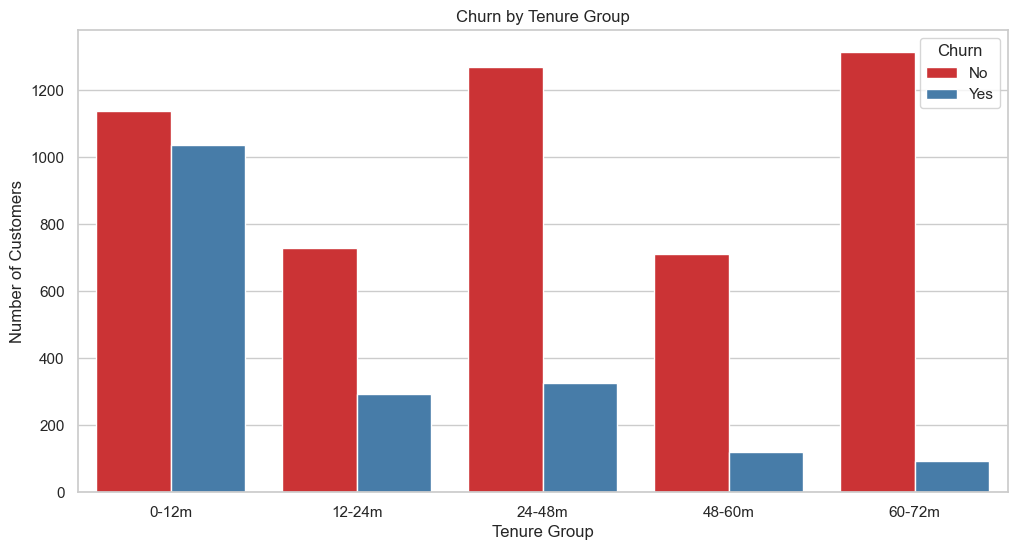

In [16]:
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 60, 72],
    labels=["0-12m", "12-24m", "24-48m", "48-60m", "60-72m"],
)

sns.countplot(data=df, x="tenure_group", hue="Churn", palette="Set1")
plt.title("Churn by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Customers")
plt.show()

Key Insights from Churn by Tenure Group

1. Churn is highest in the first 12 months (0–12m)

The 0–12m group has the highest absolute number of churns.

Nearly equal bars for Churn = Yes and No, indicating high churn rate.

Insight:

* New customers are at the highest risk of churn — the first year is critical.

2. Churn decreases with customer longevity

Churn counts drop significantly for customers in the 48–60m and 60–72m ranges.

These long-tenure groups are dominated by non-churners.

Insight:

* Customers who remain longer tend to be satisfied and loyal.

3. Unusual churn spike in 24–48m group

A noticeable rise in churn count appears in 24–48m, despite customers being mid-tenure.

Churn > retention in this group.

Insight:

* Mid-term customers may hit a satisfaction plateau or contract renewal point that triggers churn.

## 2.13 Pairplot (multivariate exploration)

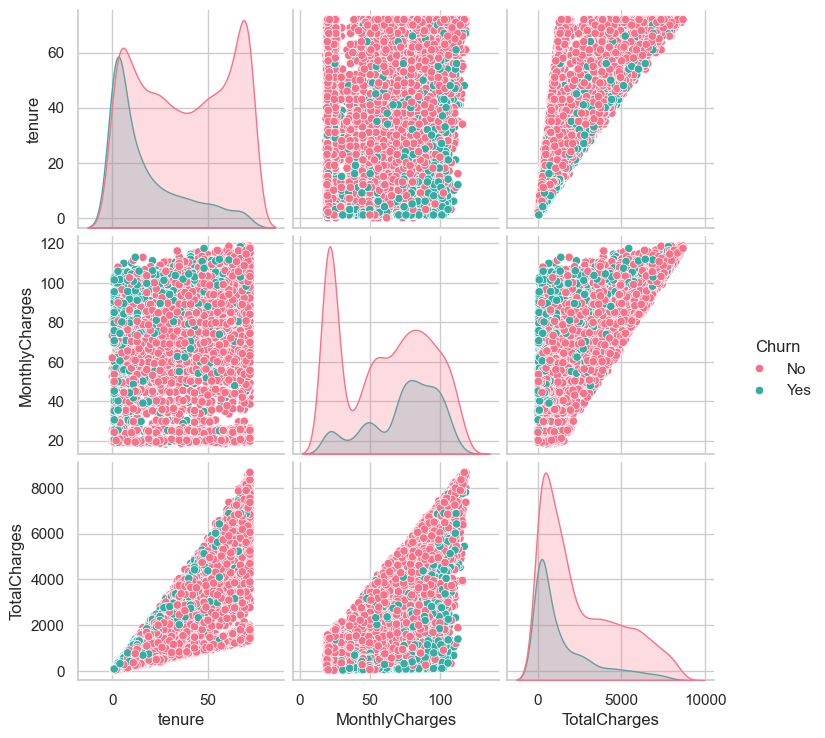

In [17]:
sns.pairplot(df[numerical_cols + ["Churn"]], hue="Churn", diag_kind="kde", palette="husl")
plt.show()

Key Insights from Pairplot Analysis

1. Churn is highly concentrated among low-tenure customers

In the tenure vs other features plots, churned customers (Churn = Yes, in teal) cluster heavily at low tenure values (closer to 0).

Customers who stayed (Churn = No, in pink) are more widely spread across the entire tenure range.

Insight:

* Most churn occurs early in the customer lifecycle, confirming previous insights from histograms and boxplots.


2. Clear diagonal trend between tenure and TotalCharges

There’s a strong linear relationship between tenure and TotalCharges for both churn and non-churn groups.

However, customers who churned are clustered toward the lower-left corner (short tenure, low total charges).

Insight:

* Customers who churn don’t accumulate high value over time — they leave early before generating significant revenue.


3. Churn appears across all ranges of MonthlyCharges

Churned customers exist across all levels of monthly charges, though they’re more dense in the mid-to-high range (≈ $70–$100).

Retained customers dominate the low-cost segments.

Insight:

* While MonthlyCharges alone isn’t a strong separator, high-value plans still carry slightly more churn risk.


4. Distribution on diagonals (KDE plots)

The diagonal KDE plots show churned users with:

A sharp peak at low tenure

A broader and slightly higher range of MonthlyCharges

A right-skewed TotalCharges distribution mostly below 2,000

Insight:

* All three numerical variables have non-normal distributions, with churners clustering at the lower end of tenure and total value.

EDA Summary – Key Insights from Churn Analysis (CRISP-DM: Data Understanding Phase)

1. Customer Tenure & Churn Behavior
* Short-tenure customers (0–12 months) have the highest churn rate.
* Long-tenure customers (48+ months) rarely churn, indicating customer loyalty increases over time.
* The boxplot confirms that churned customers typically have much shorter tenures.

2. Monthly and Total Charges
* MonthlyCharges are slightly higher for churned customers.
* TotalCharges are significantly lower among churned customers, which correlates with short tenure.
* Histograms and KDE plots reveal a clear density difference between churned and retained customers, especially in TotalCharges.

3. Tenure Groups
* When grouping customers by tenure ranges (e.g., 0–12m, 12–24m, etc.):
* The 0–12m group has the largest number of churners.
* The 60–72m group has nearly no churners, showing strong customer retention among long-term users.

4. Pairplot Correlation
* The strongest linear relationship is between Tenure and TotalCharges.
* Churned customers are clustered toward the lower-left corner, reflecting low tenure and low total charges.
* This supports the hypothesis that early-stage customers are at highest churn risk.

5. Categorical Variables (Countplots & Churn Rates)

Contract Type:
* Month-to-month contracts show the highest churn (~45%).
* Two-year contracts show very low churn (<10%).

Internet Service:
* Fiber optic users churn more frequently.
* Customers with no internet service rarely churn.

Online Services:
* Lack of OnlineSecurity, Backup, DeviceProtection, or TechSupport is strongly associated with churn.

Billing Preferences:
* Paperless Billing users churn more often.
* Electronic check is the payment method with the highest churn rate.

Demographics:
* Senior citizens, single customers (no partner), and those without dependents are more likely to churn.
* Gender has no significant effect on churn.